In [6]:
!pip install --user wordcloud

    100% |████████████████████████████████| 368kB 173kB/s ta 0:00:01
You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
!python -m site --user-site

/home/mygeohub/mygeohub07/.local/lib/python3.6/site-packages


In [1]:
import sys
sys.path.append('/home/mygeohub/mygeohub07/.local/lib/python3.6/site-packages')

In [90]:
from ipyleaflet import *
import requests
import nltk
nltk.download('punkt')
import xml.etree.ElementTree as ET
wfs_url = 'https://idpgis.ncep.noaa.gov/arcgis/services/NWS_Forecasts_Guidance_Warnings/watch_warn_adv/MapServer/WFSServer'

m = Map(center=(39.82, -98.58), zoom=4, basemap=basemaps.OpenStreetMap.Mapnik)
wms = WMSLayer(url='http://idpgis.ncep.noaa.gov/arcgis/services/NWS_Forecasts_Guidance_Warnings/watch_warn_adv/MapServer/WMSServer', 
               layers='0',
               format='image/png',
               transparent=True)
m.add_layer(wms)
mymark = Marker(location=[38,-95])
m.add_layer(mymark)
dc = DrawControl()
dc.rectangle = {
    "shapeOptions": {
        "fillColor": "#fca45d",
        "color": "#fca45d",
        "transparent": True
    }
}
def handle_draw(self, action, geo_json):
    coords = geo_json['geometry']['coordinates'][0]
    bbox = '%s,%s,%s,%s' % (coords[0][0],coords[0][1],coords[2][0],coords[2][1])
    payload = {'service':'WFS',
               'version': '1.1.0',
               'request': 'GetFeature',
               'typename': 'watch_warn_adv:WatchesWarnings',
               'srsname': 'EPSG:4326',
               'bbox': bbox
              }
    r = requests.get(wfs_url,params=payload)
    root = ET.fromstring(r.text)
    for child in root:
        #print(child.tag, child.attrib)
        for grandchild in child:
            #print(grandchild.tag,grandchild.attrib)
            for subchild in grandchild:
                if subchild.tag.endswith('prod_type'):
                    #rintchild.text)
                    sentence = subchild.text
                    tokens = nltk.word_tokenize(sentence)
                    print(tokens)
    

dc.on_draw(handle_draw)
m.add_control(dc)
m


[nltk_data] Downloading package punkt to
[nltk_data]     /home/mygeohub/mygeohub07/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors', 'name': 'OpenStreetMap.Mapnik'}, center=[39.82, -98.58], controls=(DrawControl(layer=FeatureGroup(), polygon={'shapeOptions': {}}, polyline={'shapeOptions': {}}, rectangle={'shapeOptions': {'fillColor': '#fca45d', 'color': '#fca45d', 'transparent': True}}),), layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, name='OpenStreetMap.Mapnik', options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size']), WMSLayer(format='image/png', layers='0', options=['attribution', 'crs', 'detect_retina', 'format', 'layers', 'max_zoom', 'min_zoom', 'styles', 'tile_size', 'transparent', 'uppercase'], transparent=True, url='http://idpgis.ncep.noaa.gov/arcgis/services/NWS_Forecasts_Guidance_Warnings/watch_warn_adv/MapServer/WMSServer'), Marker(location=[38, -95], options=['alt', 'clickable', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'title', 'z_index_offset'])), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'], zoom=4)

['Excessive', 'Heat', 'Warning']
['Heat', 'Advisory']
['Heat', 'Advisory']
['Excessive', 'Heat', 'Warning']
['Heat', 'Advisory']
['Heat', 'Advisory']
['Red', 'Flag', 'Warning']
['Red', 'Flag', 'Warning']
['Red', 'Flag', 'Warning']
['Red', 'Flag', 'Warning']
['Red', 'Flag', 'Warning']


In [108]:


import tweepy
from tweepy import *

consumer_key = 'SUut9AfWzqhr0CyYB2nhYQgep'
consumer_secret = 'eKClW8FbL5unUqxThoffRfE2iYtjfmLjzKjY5JxvNUhQZdeeXB'
access_token_key = '756563398284935170-gBaZg7pbr0k9d3wvs4Nseps8q1uttK0'
access_token_secret = 'yi9PBY8qriBBWFYsG4hPgkdtBfeMzHeM1cEJVA2tM2BKy'

auth = OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token_key, access_token_secret)
api = API(auth)
hashtags_dict = dict()
hashtags_file = open('hashtags.txt','w')
#override tweepy.StreamListener to add logic to on_status
class MyStreamListener(tweepy.StreamListener):

    def on_status(self, status):
        for hashtag in status.entities['hashtags']:
            key = hashtag['text']
            if key in hashtags_dict:
                hashtags_dict[key] += 1
            else:
                hashtags_dict[key] = 1
            #print(hashtag['text'])
    
        
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)

myStream.filter(track=['storming','weather','floods','rain','climate','drizzle','fog','hot','heat','hail',
                    'lightning','precipitation','thunderstorm','sunny','cloudy','thunder','warm','degrees','humidity','windy','outside'
                    ,'forcast','fog','gloomy','warming','cooling'])


#myStream.filter(track=['storm','weather','floods'])





KeyboardInterrupt: 

In [115]:
hashtags_dict

{'uparkfestival': 1,
 'uber': 1,
 'InMyFeelingsChallenge': 14,
 'tbt': 1,
 'BREAKING': 3,
 'THORissues': 1,
 'Heat': 10,
 'ThrashMetal': 1,
 'BiggBossTelugu2': 3,
 'Moray': 1,
 'Finland': 1,
 'summer': 9,
 'GlobalWarming': 1,
 'BillyBoy': 1,
 'monkeymogs': 1,
 'FridayFeeling': 4,
 'animation': 6,
 'illustration': 7,
 'motiongraphics': 6,
 '2d': 6,
 'Qanon': 4,
 'GoddessGang': 1,
 'DogsDieInHotCars': 1,
 'rain': 69,
 'NUFC': 1,
 'reigate': 1,
 'Jyvaskyla': 1,
 'Nairobi': 1,
 'Kenya': 1,
 'gutters': 12,
 'season': 12,
 'gut': 12,
 'KaushalArmy': 3,
 'TroyNY': 2,
 'penncoaching': 1,
 'FHSAA': 1,
 'Kigali': 1,
 'Rwanda': 1,
 'loveisland': 1,
 'LittleMix': 1,
 'PerrieEdwards': 1,
 'piday': 4,
 'raspberrypi': 4,
 'Apeldoorn': 1,
 'zaterdag': 1,
 'onweer': 1,
 'regen': 1,
 'gtxwx': 1,
 'TX': 1,
 'txwx': 1,
 'Dehydration': 1,
 'thunderstorm': 31,
 'LewisvilleWX': 1,
 'Severe': 3,
 'Ottawa': 1,
 'ONstorm': 1,
 'meteoLiguria': 1,
 'Nervi': 1,
 'GenovaNervi': 1,
 'weather': 35,
 'erotica': 1,
 'e

In [123]:
for key in hashtags_dict:
    count = 0
    while count < hashtags_dict[key]:
        count += 1
        text = '%s\n' % key
        hashtags_file.write(text)
hashtags_file.close()

ValueError: I/O operation on closed file.

<Figure size 432x288 with 0 Axes>

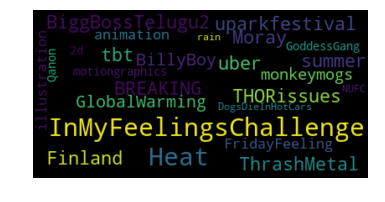

<Figure size 432x288 with 0 Axes>

In [119]:
from wordcloud import WordCloud

text = open('hashtags.txt').read()
wordcloud = WordCloud().generate(text)
wc = WordCloud(background_color="white")

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
                      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure()